In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from scipy.stats import skew
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Lasso
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.feature_selection import SequentialFeatureSelector
from pygam import LinearGAM, s, f
import statsmodels.api as sm

C:\Users\kiera\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import the forest fire data set into a pandas data frame.
df = pd.read_csv(r"C:\Users\kiera\OneDrive\Desktop\BSC Computer Science\Machine Learning for Economics\CA2\Data\forestfires.csv"
                 ,header=0)
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [3]:
#print data summary table.
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Skew measure for non-transformed data: 12.809629951754577


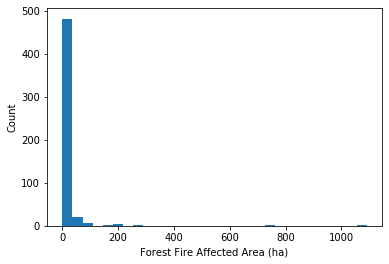

In [4]:
#plot histogram of the area variable.
x = df['area']
plt.hist(x, density=False, bins=30)  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('Forest Fire Affected Area (ha)')
print('Skew measure for non-transformed data: ' + str(skew(x)))

In [5]:
#add the ln(area + 1) column and drop the area column.
df['ln(area + 1)'] = np.log(df['area'] + 1)
df = df.drop('area', 1)
df

C:\Users\kiera\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,ln(area + 1)
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


Skew measure for transformed data: 1.2143014263185365


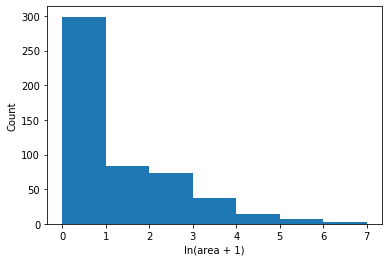

In [6]:
#plot histogram of the ln(area + 1) variable.
x = df['ln(area + 1)']
plt.hist(x, density=False, bins=[0,1,2,3,4,5,6,7])  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('ln(area + 1)')
print('Skew measure for transformed data: ' + str(skew(x)))

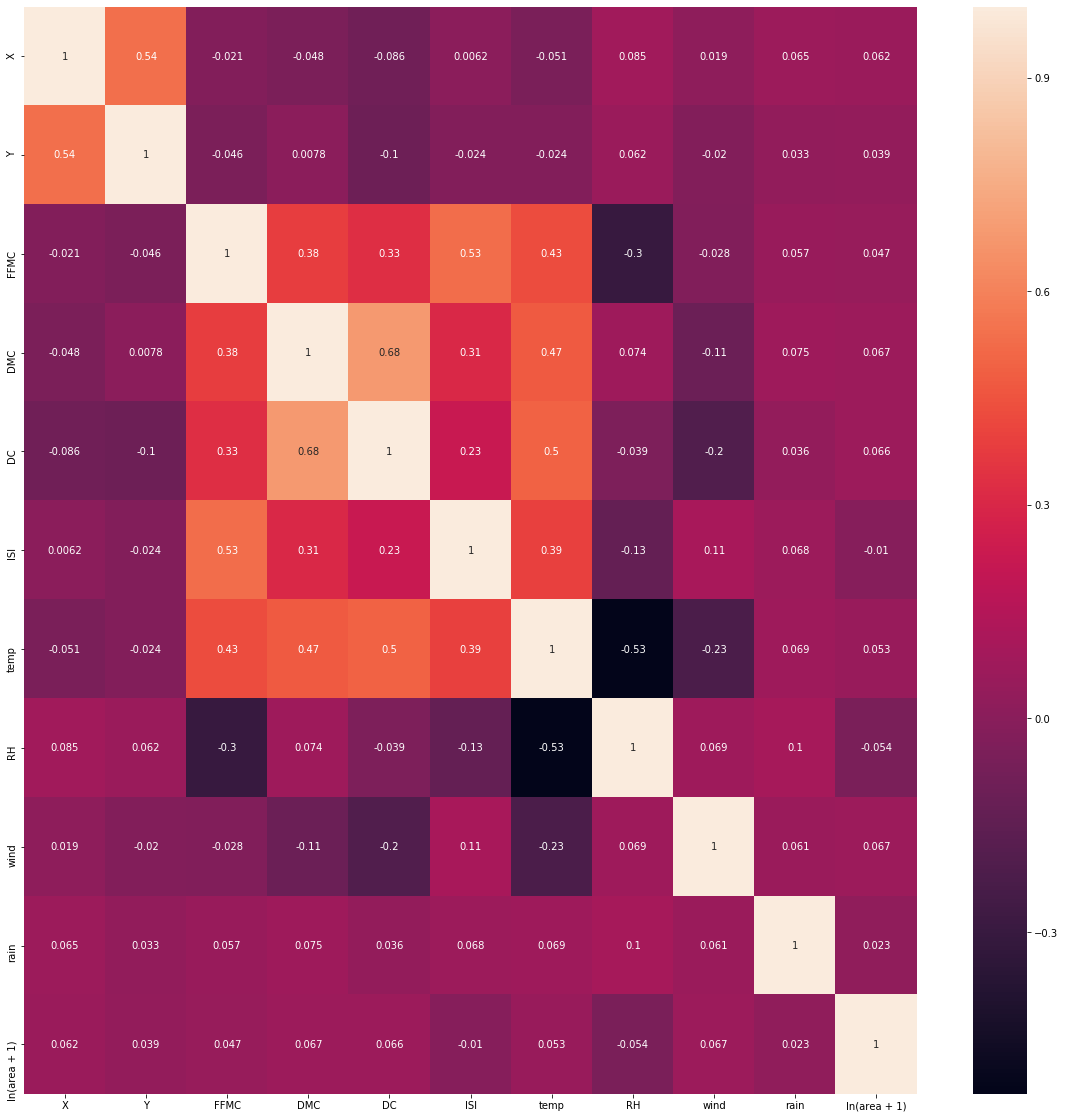

In [11]:
#plot a correlation matrix of the forest fires dataset
corrMatrix = df.corr()
plt.rcParams["figure.figsize"] = (20,20)
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [12]:
#show the highest correlations.
corrMatrix["ln(area + 1)"].sort_values(ascending=False)

ln(area + 1)    1.000000
DMC             0.067153
wind            0.066973
DC              0.066360
X               0.061995
temp            0.053487
FFMC            0.046799
Y               0.038838
rain            0.023311
ISI            -0.010347
RH             -0.053662
Name: ln(area + 1), dtype: float64

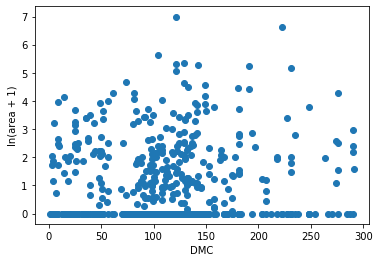

In [7]:
#plot a scatter graph of DMC against ln(area + 1)
x = df['DMC']
y = df['ln(area + 1)']
plt.scatter(x, y)
plt.ylabel('ln(area + 1)')
plt.xlabel('DMC')
plt.show()

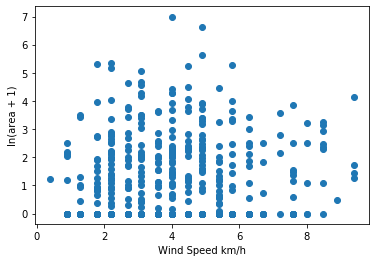

In [8]:
#plot a scatter graph of wind against ln(area + 1)
x = df['wind']
y = df['ln(area + 1)']
plt.scatter(x, y)
plt.ylabel('ln(area + 1)')
plt.xlabel('Wind Speed km/h')
plt.show()

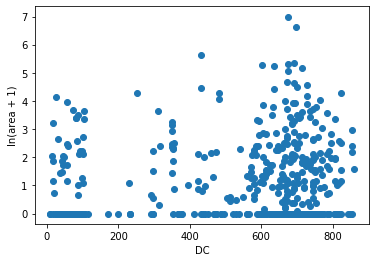

In [9]:
#plot a scatter graph of DC against ln(area + 1)
x = df['DC']
y = df['ln(area + 1)']
plt.scatter(x, y)
plt.ylabel('ln(area + 1)')
plt.xlabel('DC')
plt.show()

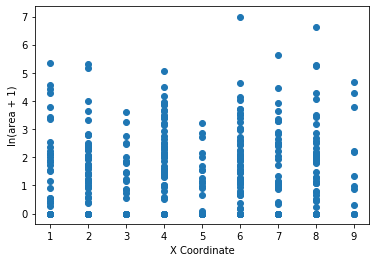

In [10]:
#plot a scatter graph of X against ln(area + 1)
x = df['X']
y = df['ln(area + 1)']
plt.scatter(x, y)
plt.ylabel('ln(area + 1)')
plt.xlabel('X Coordinate')
plt.show()

In [13]:
#Search the data frame for columns containing only a single value.
single_values = df.nunique()
to_drop = [i for i,v in enumerate(single_values) if v == 1]
print(to_drop)

[]


In [14]:
#Search the data frame for columns containing data with low variance.
to_drop = [i for i,v in enumerate(single_values) if (float(v)/df.shape[0]*100) < 1]
print(to_drop)

[]


In [15]:
#Search the data frame for duplicate rows.
dups = df.duplicated()
print(dups.any())

True


In [16]:
#drop all duplicate rows
df.drop_duplicates()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,ln(area + 1)
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


In [17]:
#search for outliers in a subframe and drop them.
df2 = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'ln(area + 1)']]
df2 = df2[(np.abs(stats.zscore(df2)) < 3).all(axis=1)]
df2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,ln(area + 1)
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.000000
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


In [18]:
#create a new dataframe where all outliers have been dropped.
df = df.iloc[list(df2.index.values)]
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,ln(area + 1)
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.000000
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


In [19]:
#create an encoder and encode the day column as integers.
encoder = OrdinalEncoder()
days = df[['day']].values
days_encoded = encoder.fit_transform(days)
df['day'] = days_encoded.astype(np.int8)

#create an encoder and encode the month column as integers.
encoder = OrdinalEncoder()
months = df[['month']].values
months_encoded = encoder.fit_transform(months)
df['month'] = months_encoded.astype(np.int8)

C:\Users\kiera\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\kiera\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [20]:
features = df[['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']] #Set the model features.
target = df[['ln(area + 1)']] #Set the model target.
x_train, x_test, y_train, y_test = train_test_split(features.values, target.values, test_size=0.5, random_state=1) #Instantiate 
                                                                                                     #the training
                                                                                                     #and testing sets using a 
                                                                                                     # 50:50 split
y_train = y_train.ravel()
y_test = y_test.ravel()

MULTIPLE LINEAR REGRESSION MODEL

In [ ]:
#set the parameter grid for cross validation.
param_grid = {'fit_intercept':[True,False], 
              'copy_X':[True, False],
              'n_jobs':[1,2,4,8,16,32],
              'positive':[True, False]}
#create a blank model.
regressor = LinearRegression()
#use grid search cross validation.
regressor_grid_search = GridSearchCV(regressor, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
#fit the training data to the grid search model.
regressor_grid_search.fit(x_train,y_train)

In [ ]:
#print the best features found by cross validation.
regressor_grid_search.best_estimator_

In [ ]:
#create the tuned model and predict values using the test data.
linear_regression_model = regressor_grid_search.best_estimator_
pred = linear_regression_model.predict(x_test)

#calculate performance metrics.
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('MSE: ',mse)
print('MAE: {}'.format(mean_absolute_error(y_test, pred)))
print('R^2: ',r2)

FORWARD SELECTION MODEL

In [ ]:
#create a blank model.
forward_model = LinearRegression()

#perform forward sequential feature selection on the black model.
sfs1 = SequentialFeatureSelector(forward_model,
                                 k_features=5,
                                 forward=True,
                                 floating=False,
                                 verbose=2,
                                 scoring='neg_mean_squared_error',
                                 cv=5)

#fit the training data to the selector.
sfs1 = sfs1.fit(x_train, y_train)

In [ ]:
#print the best features.
feat_cols1 = list(sfs1.k_feature_idx_)
print(feat_cols1)

In [ ]:
#create the tuned model and predict values using the test data.
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train[:, feat_cols1], y_train)
pred = linear_regression_model.predict(x_test[:, feat_cols1])

#calculate performance metrics.
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('MSE: ',mse)
print('MAE: {}'.format(mean_absolute_error(y_test, pred)))
print('R^2: ',r2)

BACKWARD SELECTION MODEL

In [ ]:
#create a blank model.
backward_model = LinearRegression()

#perform backward sequential feature selection on the black model.
sfs2 = SequentialFeatureSelector(backward_model,
                                 k_features=5,
                                 forward=False,
                                 floating=False,
                                 verbose=2,
                                 scoring='neg_mean_squared_error',
                                 cv=5)

#fit the training data to the selector.
sfs2 = sfs2.fit(x_train, y_train)

In [ ]:
#print the best features.
feat_cols2 = list(sfs2.k_feature_idx_)
print(feat_cols2)

In [ ]:
#create the tuned model and predict values using the test data.
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train[:, feat_cols2], y_train)
pred = linear_regression_model.predict(x_test[:, feat_cols2])

#calculate performance metrics.
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('MSE: ',mse)
print('MAE: {}'.format(mean_absolute_error(y_test, pred)))
print('R^2: ',r2)

RIDGE REGRESSION MODEL

In [ ]:
#set the parameter grid for cross validation.
param_grid = {'alpha':[1, 10],
              'fit_intercept':[True,False], 
              'copy_X':[True, False],
              'positive':[True, False],
             }
#create a blank model.
ridge = Ridge()
#use grid search cross validation.
ridge_grid_search = GridSearchCV(ridge, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
#fit the training data to the grid search model.
ridge_grid_search.fit(x_train,y_train)

In [ ]:
#print the best features found by cross validation.
ridge_grid_search.best_estimator_

In [ ]:
#create the tuned model and predict values using the test data.
ridge_regression_model = ridge_grid_search.best_estimator_
pred = ridge_regression_model.predict(x_test)

#calculate performance metrics.
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('MSE: ',mse)
print('MAE: {}'.format(mean_absolute_error(y_test, pred)))
print('R^2: ',r2)

LASSO REGRESSION MODEL

In [ ]:
#set the parameter grid for cross validation.
param_grid = {'alpha':[1, 10],
              'fit_intercept':[True,False],
              'precompute':[True,False],
              'copy_X':[True, False],
              'positive':[True, False],
              'selection':['cyclic', 'random']
             }
#create a blank model.
lasso = Lasso()
#use grid search cross validation.
lasso_grid_search = GridSearchCV(lasso, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
#fit the training data to the grid search model.
lasso_grid_search.fit(x_train,y_train)

In [ ]:
#print the best features found by cross validation.
lasso_grid_search.best_estimator_

In [ ]:
#create the tuned model and predict values using the test data.
lasso_regression_model = lasso_grid_search.best_estimator_
pred = lasso_regression_model.predict(x_test)

#calculate performance metrics.
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('MSE: ',mse)
print('MAE: {}'.format(mean_absolute_error(y_test, pred)))
print('R^2: ',r2)

PLS REGRESSION MODEL

In [ ]:
#set the parameter grid for cross validation.
param_grid = {'n_components':[1, 5, 10],
              'scale':[True,False],
              'copy':[True, False],
             }
#create a blank model.
pls = PLSRegression()
#use grid search cross validation.
pls_grid_search = GridSearchCV(pls, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
#fit the training data to the grid search model.
pls_grid_search.fit(x_train,y_train)

In [ ]:
#print the best features found by cross validation.
pls_grid_search.best_estimator_

In [ ]:
#create the tuned model and predict values using the test data.
pls_regression_model = pls_grid_search.best_estimator_
pred = pls_regression_model.predict(x_test)

#calculate performance metrics.
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('MSE: ',mse)
print('MAE: {}'.format(mean_absolute_error(y_test, pred)))
print('R^2: ',r2)

GAM

In [ ]:
#create a GAM model with splines tuned to features 0, 4 and 6
gam = LinearGAM(s(0) + s(4) + s(6)).fit(x_train, y_train)

In [ ]:
#print a summary of the GAM model.
gam.summary()

In [ ]:
#create the tuned model and predict values using the test data.
pred = gam.predict(x_test)

#calculate performance metrics.
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('MSE: ',mse)
print('MAE: {}'.format(mean_absolute_error(y_test, pred)))
print('R^2: ',r2)

TREE REGRESSION MODEL

In [ ]:
#set the parameter grid for cross validation.
param_grid = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'splitter':['best', 'random'],
              'max_depth':[1, 5, 10, 50, 100],
              'min_samples_split':[1, 2, 5, 10],
              'min_samples_leaf':[1, 2, 5, 10],
              'max_features':['auto', 'sqrt', 'log2'],
             }
#create a blank model.
tree = DecisionTreeRegressor()
#use grid search cross validation.
tree_grid_search = GridSearchCV(tree, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
#fit the training data to the grid search model.
tree_grid_search.fit(x_train,y_train)

In [ ]:
#print the best features found by cross validation.
tree_grid_search.best_estimator_

In [ ]:
#create the tuned model and predict values using the test data.
tree_regression_model = tree_grid_search.best_estimator_
pred = tree_regression_model.predict(x_test)

#calculate performance metrics.
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('MSE: ',mse)
print('MAE: {}'.format(mean_absolute_error(y_test, pred)))
print('R^2: ',r2)

BAGGING REGRESSOR MODEL

In [ ]:
#set the parameter grid for cross validation.
param_grid = {'n_estimators':[1,5,10],
              'max_samples':[1, 2, 8],
              'max_features':[1, 2, 8],
              'bootstrap':[True, False],
              'bootstrap_features':[True, False],
              'warm_start':[True, False],
              'n_jobs': [None, 1, 5, 10]
             }
#create a blank model.
bag = BaggingRegressor()
#use grid search cross validation.
bag_grid_search = GridSearchCV(bag, param_grid, cv=5,
                           scoring='neg_mean_squared_error', verbose = 2)
#fit the training data to the grid search model.
bag_grid_search.fit(x_train,y_train)

In [ ]:
#print the best features found by cross validation.
bag_grid_search.best_estimator_

In [ ]:
#create the tuned model and predict values using the test data.
bag_regression_model = bag_grid_search.best_estimator_
pred = bag_regression_model.predict(x_test)

#calculate performance metrics.
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('MSE: ',mse)
print('MAE: {}'.format(mean_absolute_error(y_test, pred)))
print('R^2: ',r2)

FOREST REGRESSOR MODEL

In [ ]:
#set the parameter grid for cross validation.
param_grid = {'n_estimators':[1,10, 100],
              'criterion':['squared_error', 'absolute_error', 'poisson'],
              'max_depth':[1, 10, 100],
              'min_samples_split':[1, 5, 10],
              'min_samples_leaf':[1, 5, 10],
              'max_features':['auto', 'sqrt', 'log2'],
             }
#create a blank model.
forest = RandomForestRegressor()
#use grid search cross validation.
forest_grid_search = GridSearchCV(forest, param_grid, cv=2,
                           scoring='neg_mean_squared_error', verbose = 2)
#fit the training data to the grid search model.
forest_grid_search.fit(x_train,y_train)

In [ ]:
#print the best features found by cross validation.
forest_grid_search.best_estimator_

In [ ]:
#create the tuned model and predict values using the test data.
forest_regression_model = forest_grid_search.best_estimator_
pred = forest_regression_model.predict(x_test)

#calculate performance metrics.
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('MSE: ',mse)
print('MAE: {}'.format(mean_absolute_error(y_test, pred)))
print('R^2: ',r2)

BOOSTING REGRESSOR MODEL

In [ ]:
#set the parameter grid for cross validation.
param_grid = {'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
              'criterion':['squared_error', 'friedman_mse'],
              'learning_rate':[0.1, 0.5],
              'max_depth':[1, 10, 100],
              'min_samples_split':[1, 5, 10],
              'min_samples_leaf':[1, 5, 10],
              'max_features':['auto', 'sqrt', 'log2'],
             }
#create a blank model.
boosting = GradientBoostingRegressor()
#use grid search cross validation.
boosting_grid_search = GridSearchCV(boosting, param_grid, cv=2,
                           scoring='neg_mean_squared_error', verbose = 2)
#fit the training data to the grid search model.
boosting_grid_search.fit(x_train,y_train)

In [ ]:
#print the best features found by cross validation.
boosting_grid_search.best_estimator_

In [ ]:
#create the tuned model and predict values using the test data.
boosting_regression_model = boosting_grid_search.best_estimator_
pred = boosting_regression_model.predict(x_test)

#calculate performance metrics.
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('MSE: ',mse)
print('MAE: {}'.format(mean_absolute_error(y_test, pred)))
print('R^2: ',r2)